In [1]:
import os 
import sys
import matplotlib.pyplot as plt


repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', ))
sys.path.append(repo_root)

from src import *
from src.models.BradleyTerry import *
from tst.tst_weight_conversion.old_newman import * 

In [2]:
def compute_predicted_ratings_HO_BT_info(training_set, pi_values): 
    bond_matrix = create_hypergraph_from_data_weight(training_set)
    predicted_ho_scores, iter = synch_solve_equations(bond_matrix, 10000, pi_values, iterate_equation_newman_weighted, sens=1e-6)
    return predicted_ho_scores, iter

In [3]:
def synch_solve_equations_info(bond_matrix, max_iter, pi_values, method, sens=1e-10):
    scores = {n: 1.0 for n in pi_values}
    normalize_scores_old(scores)

    info = {}
    err = 1.0
    iteration = 0
    while iteration < max_iter and err > sens:
        
        err = 0.0
        tmp_scores = {}


        for s in scores:
            tmp_scores[s] = method(s, scores, bond_matrix)

                 
        normalize_scores_old(tmp_scores)

        for s in tmp_scores:
            if abs(tmp_scores[s]-scores[s]) > err:
                err = abs(tmp_scores[s]-scores[s])
            scores[s] = tmp_scores[s]
                
        # print(err)
        iteration += 1
        info[iteration] = err

   
    return scores, iteration


def compute_predicted_ratings_HO_BT_info_random(training_set, pi_values, max_iter=1000): 
    # Using un-weighted newman iterative schema such that a random shuffle of the data can occur 
    bond_matrix = create_hypergraph_from_data_old(training_set)
    predicted_ho_scores, info  = synch_solve_equations_info(bond_matrix, max_iter, pi_values, iterate_equation_newman_old, sens=1e-6)
 
    return predicted_ho_scores, info

In [7]:
values = {}
K_values = [2, 3, 4, 5, 6, 7, 8, 10]
for K in K_values:

    for rep in range(100):
        data, pi_values = generate_weighted_model_instance(100, 100, K , K)
        predicted_scores, iter = compute_predicted_ratings_HO_BT_info(data, pi_values)

        # data, pi_values = generate_model_instance(100, 100, K , K)
        # predicted_scores, iter = compute_predicted_ratings_HO_BT_info_random(data, pi_values)

        if K in values:
            values[K].append(iter)
        else:
            values[K] = [iter]
    

In [8]:
avg = {k: np.mean(v) for k,v in values.items()} 

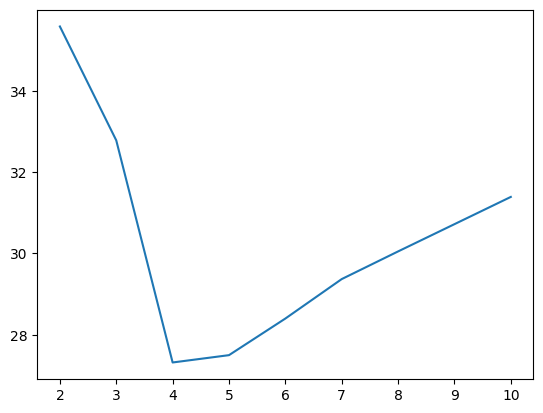

In [9]:
plt.plot(list(avg.keys()), list(avg.values()))